<a href="https://colab.research.google.com/github/inmas-training/fa21-statistical-methods-workshop/blob/main/04a-hypothesis-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Within this notebook, we introduce hypothesis testing. Please note, this notebook emphasizes logistic regression using `statsmodels`.

## Diagnostics


In [1]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

print(f"\nPython environment:\n{sys.version}")
print("\nStatistical packages loaded: ")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

print(f"\nRuntime location:")
try:
  from google.colab import drive
  is_google_colab = True
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Python environment:
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]

Statistical packages loaded: 
pandas: 1.1.5
numpy: 1.19.5
statsmodels: 0.10.2
matplotlib: 3.2.2

Runtime location:
Notebook is on Google CoLab


## Save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to your Google Drive! Please go to: 

```
File -> Save a Copy in Drive
```



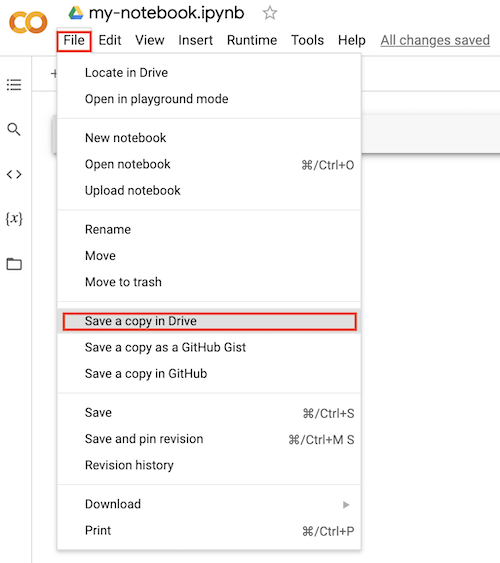

**If you _forget_ to save a copy of the notebook, all of your work will be lost when you close out of Google Colab.**

# Hypothesis Testing 

Previously, we've focused our efforts on creating estimations. In this case, we're interested in performing statistical inference using a framework geared toward testing hypothesized values in a statistically rigorous manner. 

Though, what does it mean to test a hypothesized value? Well, we must make an assertion about the contents of the value. When we make this assertion, we're creating a means to generate a testable hypothesis.



### Steps in Conducting a Hypothesis Testing (Detailed)

1. First, write out what the null and alternative hypotheses are and select the _appropriate_ hypothesis test. 
2. Set a significance level, $\alpha$.
  - Usually, this significance level is taken to be $\alpha = 0.05$. 
3. Perform the experiment to gather the data 
4. Calculate the test statistic
5. Compute a critical value or convert the test statistic into a $p$-value.
6. Compare the $p$-value against the significance level or test statistic with critical value.
7. Decide whether there exist enough evidence to reject the null hypothesis or not. 


## Null $H_0$ and Alternative $H_a$ Hypotheses

When we make an assertion about the values a variable is allowed to have, we are stating our belief. This belief is known as a **null hypothesis** and reflects our the current common conception of the world. If we can gather enough data such that our hypothesis is no longer consistent, we would rejected it in favor of **alternative hypothesis** or theory. Note, we are **not** accepting either hypothesis. 

We denote the **null hypothesis** as $H_0$. This null hypothesis represents either the "status quo", "no effect", or a usual population value. As a result, we list it as: 

$$H_0: \theta = \theta_0$$ 

where $\theta$ is the parameter of interest and $\theta_0$ is our value belief. 

Meanwhile, we denote the **alternative hypothesis** as $H_A$ or $H_1$. 

$$H_a: \theta \neq \theta_0$$

We could also specify hypotheses like so: 

- $H_0:\theta \le \theta_0$
- $H_A:\theta > \theta_0$

Or: 

- $H_0:\theta \ge \theta_0$
- $H_A:\theta < \theta_0$

The latter two are single-tailed tests while the initial is a two-sided test.


Consider the following scenario:

In Illinois, the unemployment rate is currently 6.8%.

If we hypothesize that the rate specifically in Champaign County is **higher**, then we would have the following hypotheses: 

- $H_0:\theta \le 6.8$
- $H_A:\theta > 6.8$

If we change our mind and say that unemployment in Champaign County is **lower** than elsewhere in the state, then we would have the following hypotheses: 

- $H_0:\theta \ge 6.8$
- $H_A:\theta < 6.8$

If we change our mind and say that unemployment in Champaign County is **different** than elsewhere in the state, then we would have the following hypotheses: 

- $H_0:\theta = 6.8$
- $H_A:\theta \ne 6.8$


## Your Turn: Establishing Hypotheses

Let's say you are believe the mean weight of freshman at the University of Illinois is 150 pounds with a standard deviation of 20 pounds. What would be the null and alternative hypothesis if we suspect that the mean weight of freshman is greater than 150 pounds? 

---

answer 

---

## What happens if we're wrong? 

Well, when we're wrong. We're wrong.

We specify a significance level of the test, $\alpha$, that we compare our test statistic to in order to reject or fail to reject the $H_0$. This significance level $\alpha$ represents the probability of making the wrong decision when the null hypothesis is true or a Type I error. We care deeply about avoiding Type I errors to avoid as much embarssment as possible.

Meanwhile, the probability of a Type II error (a "false negative") occuring is denoted by $\beta$. 

If we try to decrease the probability of a Type I error occuring, we will unfortunately increase the probability of a Type II error occuring. Thus, we're at an impasse. We have to have some level of tradeoff between our errors. 

The only way we could reduce the probability of both a Type I and a Type II error occuring is to increase the sample size behind the test statistic we aim to calculate. 


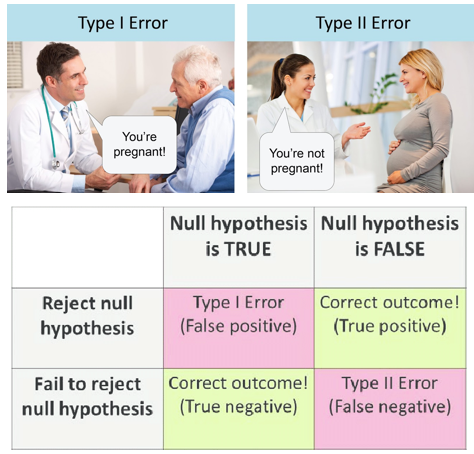

In summary, we have: 

- Type I error rate or significance level ($\alpha$):
   - The probability of rejecting the null hypothesis given that it is true.
- Type II error rate ($\beta$): 
   - The probability of failing to reject the null hypothesis when it is false. 

An alternative view point of Type I error is a jury would convict an innocent person whereas a Type II error would be the acquital of a guilty person.


## Your Turn: New Scenarios for Type I and Type II

Given the previous two examples with being declared pregnant or not and being found guilt or not, what would be an alternative scenario relating to an instance of Type I and Type II errors? 

----

answers

----

## 1-sided vs. 2-sided Critical Regions



If we have a one-tailed test, then we would specify a critical region that contains the entire $\alpha = 0.05$ in one tail (in either the left or right tail). Meanwhile, if we need to support a two-tailed hypothesis, we must split our significance level in half, e.g. $\alpha^* = \alpha/2$, which would divide the critical region on either side of the distribution. 

Consider our usual significance level of $\alpha = 0.05$. In this case, the two-tailed test that we would run has half of significance level, e.g $\alpha^*  = 0.05$) in each tail. 

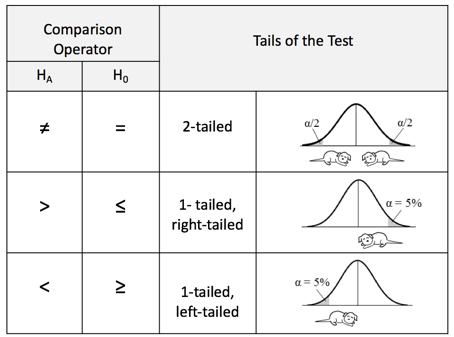

With this being said, let's determine the critical values for the given $\alpha$ level using a Normal distribution's **quantile function** to translate the significance level into a z-score.

In [2]:
from scipy.stats import norm

z_score_05 = norm.ppf(0.05)
z_score_05

-1.6448536269514729

If we had a right-tail, we would have $\alpha = 1 - 0.05 = 0.95$

In [3]:
from scipy.stats import norm
z_score_95 = norm.ppf(0.95)
z_score_95

1.6448536269514722

Fundamentally, we have the same z-score as before, just with a different direction. This is due to the symmetry of the Normal distribution.

If we had a two-sided test, then the critical value would be:

In [4]:
from scipy.stats import norm
z_score_025 = norm.ppf(0.05/2)
z_score_025

-1.9599639845400545

If we didn't have access to Python, hopefully we would have a table of pre-computed values. 

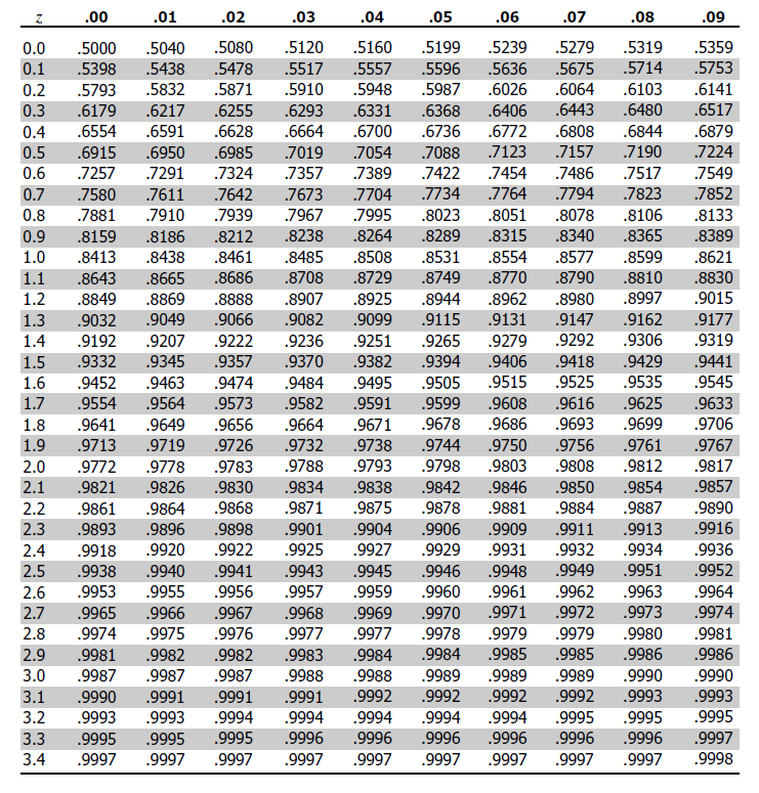

Within the table, we could look down the $z$ column to identify the z-score to the tenth's place and, then, we could move over the tabl's columns until we reached the desired location. 

### Your Turn: Computing a z-score

Compute the critical value when $\alpha = 0.10$ for a **right**-sided test.

In [5]:
## code here

Calculate the critical value when $\alpha = 0.14$ for a **two**-sided test. 

In [6]:
## code here

Using the z-table, what would be the z-score for a probability of **0.9830**? Describe how you found the probability.

---

answer

--- 

### Graphing Critical Regions

Now, let's try to understand where the critical region would lie by creating a series of points along the normal distribution's Probability Density Function (PDF). 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a grid across x evenly spaced
x = np.linspace(-3, 3, 100)

# Obtain the probability density values from the normal distribution
y = norm.pdf(x)

If we have an alternative hypothesis $H_a$ such that $H_a: \theta > \theta_0$, then we would reject the null hypothesis if it fell in the **right tail**. 

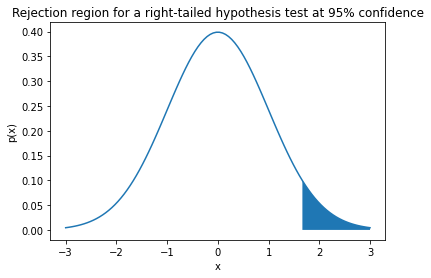

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.645)
plt.title('Rejection region for a right-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

If we have an alternative hypothesis $H_a$ such that $H_a: \theta < \theta_0$, then we would reject the null hypothesis if it fell in the **left tail**. 

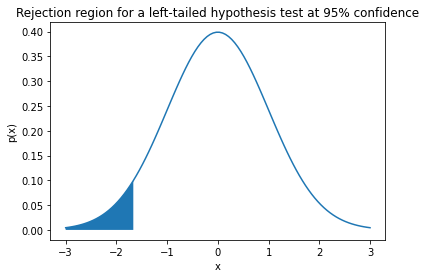

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x < -1.645)
plt.title('Rejection region for a left-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

If we have an alternative hypothesis $H_a$ such that $H_a: \theta \neq \theta_0$, then we would reject the null hypothesis if it fell in the **left or right-tail**. 

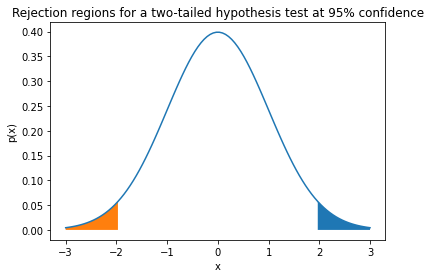

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96)
ax.fill_between(x, 0, y, where = x < -1.96)
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

## Possible Hypotheses Tests 

There are many different hypotheses tests that can be run. For this notebook, we're going to focus on just the z-test. 

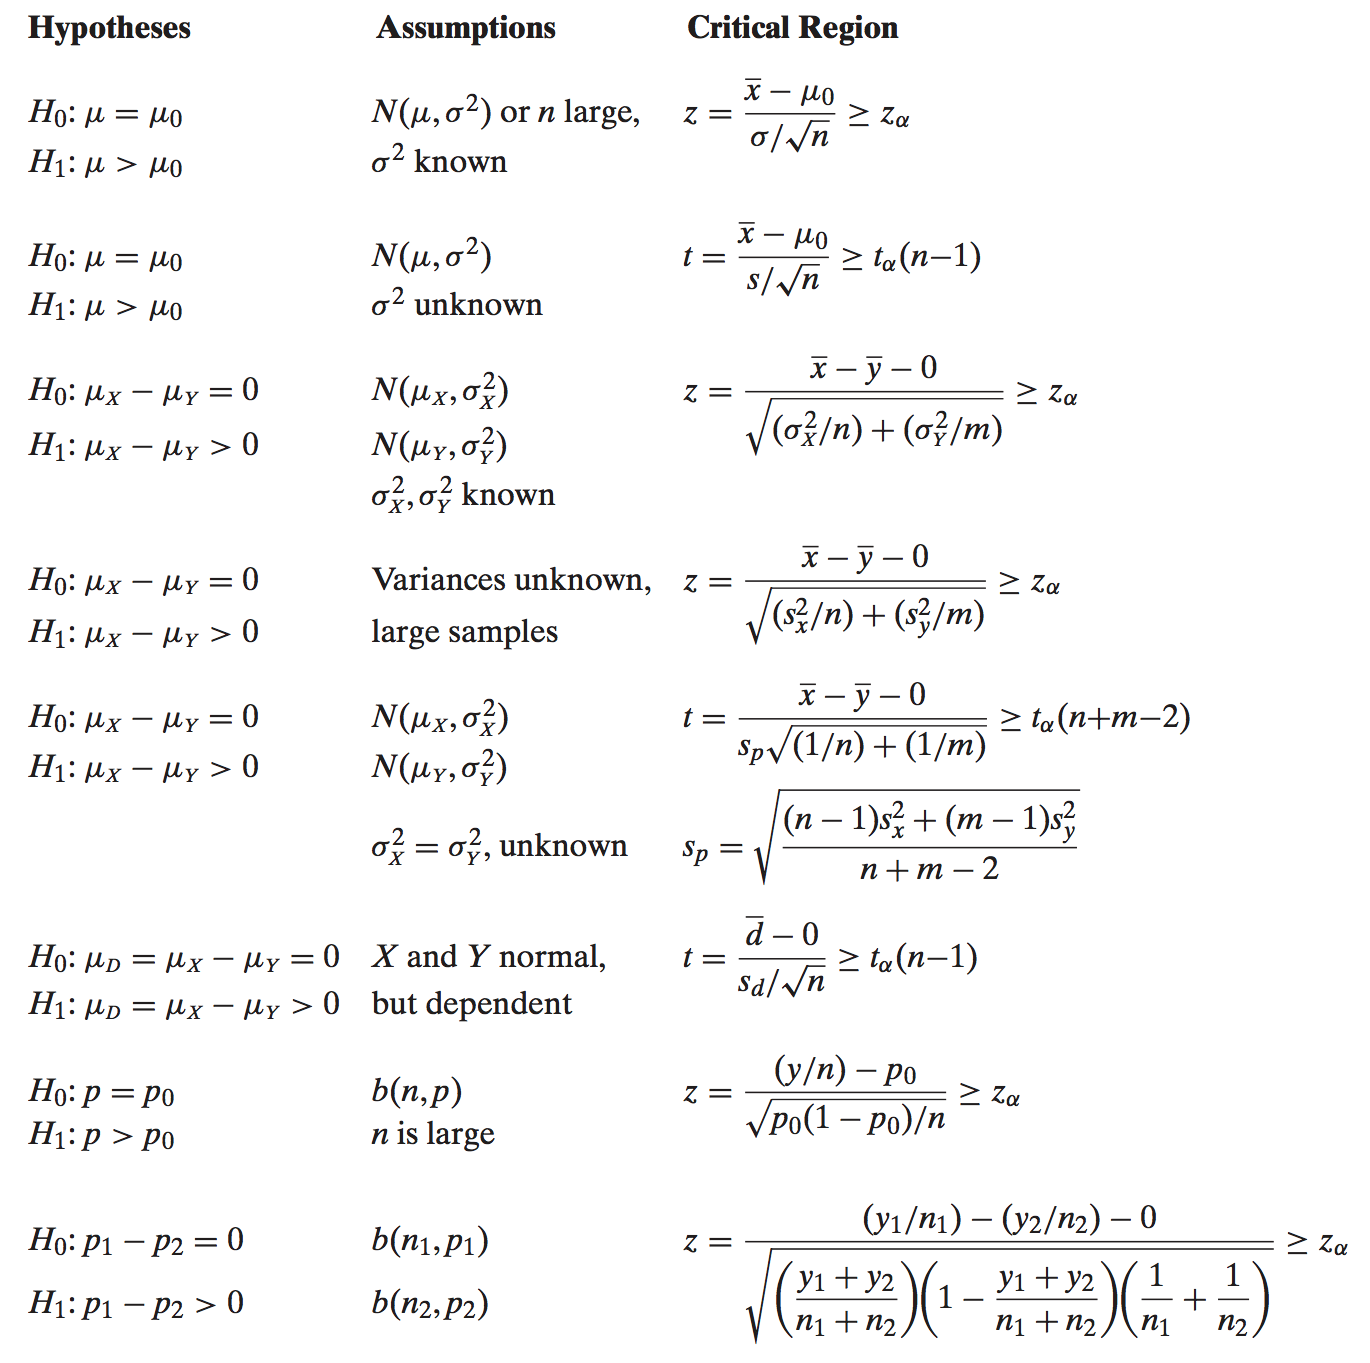

## Example: Testing a single proportion

Suppose we wish to test if a "coin" is fair or not. That is, we want to know if: 

$$
\begin{align*}
H_0: p = 0.5 \\
H_A: p \ne 0.5 \\
\end{align*}
$$
We are testing a hypothesis that is two-sided as a result. 

In this case, let's create some coin tosses by simulating data from a Binomial distribution. We seek to simulate at least 50 tosses of a coin that can land with 50/50% either heads up or tails.

In [11]:
import numpy as np 

# Set seed for reproducibility
np.random.seed(5)

n_flips = 50  # Times coin flipped 
p = 0.5 # Prob of success

# Simulate coin flips
coin_flips = np.random.binomial(1, p, n_flips)

If we let 1 be heads and 0 be tails, we would have a frequency of:

In [12]:
n_heads = coin_flips.sum()
n_heads

24

Therefore, the number of tails are given by:

In [13]:
n_tails = n_flips - n_heads
n_tails

26

We can manually compute the test statistic using either proportions or by directly using counts:

In [14]:
# Null hypothesis
p_0 = 0.5 

# Number of times landed on heads
p_trials = n_heads/n_flips

# Compute z-score
z = (p_trials - p_0) / np.sqrt(p_0*(1-p_0)/n_flips)

# Or, we could directly compute without converting
z_alt = (n_heads - n_flips*p_0) / np.sqrt(n_flips*p_0*(1-p_0))

# Compute critical region
print(f"z-score based on proportion: {z:0.4f}")
print(f"z-score based on count: {z:0.4f}")

z-score based on proportion: -0.2828
z-score based on count: -0.2828


We can convert the z-test value into a $p$-value by:

In [15]:
from scipy.stats import norm

# Two-sided test
z_test_p_value = 2*norm.cdf(-abs(z))
print(f"p-value for a two-sided test: {z_test_p_value:0.4f}")

p-value for a two-sided test: 0.7773


Next, we would compare it to our significance level $\alpha = 0.05$. In this case, we would come to the conclusion of: 

In [16]:
alpha = 0.05

if z_test_p_value < alpha: 
  print("Reject Null Hypothesis")
else:
  print("Do not reject null hypothesis")

Do not reject null hypothesis


### Calculating under a single-side

Now, let's say we think the coin is _always_ landing on heads more than tails. Our hypotheses would update to: 

$$
\begin{align*}
H_0: p \le 0.5 \\
H_A: p > 0.5 \\
\end{align*}
$$

We could re-use our estimated $z$-score, but we would have to re-compute the critical value and the probability associated with the z-score.

In [17]:
from scipy.stats import norm

z_test_p_value = norm.cdf(abs(z))
print(f"p-value for a right-sided test: {z_test_p_value:0.4f}")

p-value for a right-sided test: 0.6114


Alternatively, we could use a pre-built version inside of `statsmodels`.

In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Set our null hypothesis value
null_hypothesis = 0.50

# We're currently checking Ha > Ho, if we wanted:
# Ha < Ho use alternative='smaller'
# Ha != Ho use alternative='two-sided'
test_stat, p_value = proportions_ztest(
    count = n_heads, 
    nobs = n_flips,
    value = 0.5,  # Null hypothesis 0.5
    alternative='larger'
  )

# Display results from z-test
print(f'z-stat: {test_stat:0.4f}, p-value: {p_value:0.3f}')

z-stat: -0.2831, p-value: 0.611


Next, we can determine a quick conclusion with:

In [19]:
# Set alpha level to
# Note, you need to manually change this value
# if you use a two-sided test!
alpha = 0.05

# Provide conclusion
if p_value < alpha:
  print("Reject Null Hypothesis")
else:
  print("Do not reject null hypothesis")

Do not reject null hypothesis


## Your Turn: Bias in Advertising?

An ad for a popular toothpaste claims that 9 out of 10 dentists in the U.S. recommend their brand of toothpaste for their patients with sensitive teeth. The trade commission assembles a team of surveyors to validate the claim. They randomly sample 100 dentists from all over the U.S. From the 100 dentists surveyed, 82 indicate that they recommend the toothpaste. 

Write a null hypothesis and alternative hypothesis to test this claim.

---

answer

---

Compute the test statistic, e.g. the z-score.

In [20]:
## Code here

Convert the test statistic into a $p$-value. 

In [21]:
## Code here

If we use a significance level of $\alpha = 0.05$, is the claim accurate?

What if we changed the significance level used to $\alpha = 0.10$? 

In [22]:
##

Does the outcome change? Should we experiment with $\alpha$ levels to ensure we always reject the null hypothesis?

---

answer 

---

## Example: A/B Test with 2 proportion z-test

Visitors to a website are randomly assigned to either landing page A or landing page B to test out new ways to solicit donations. Over one month, we served visitors either landing page A or landing page B. 


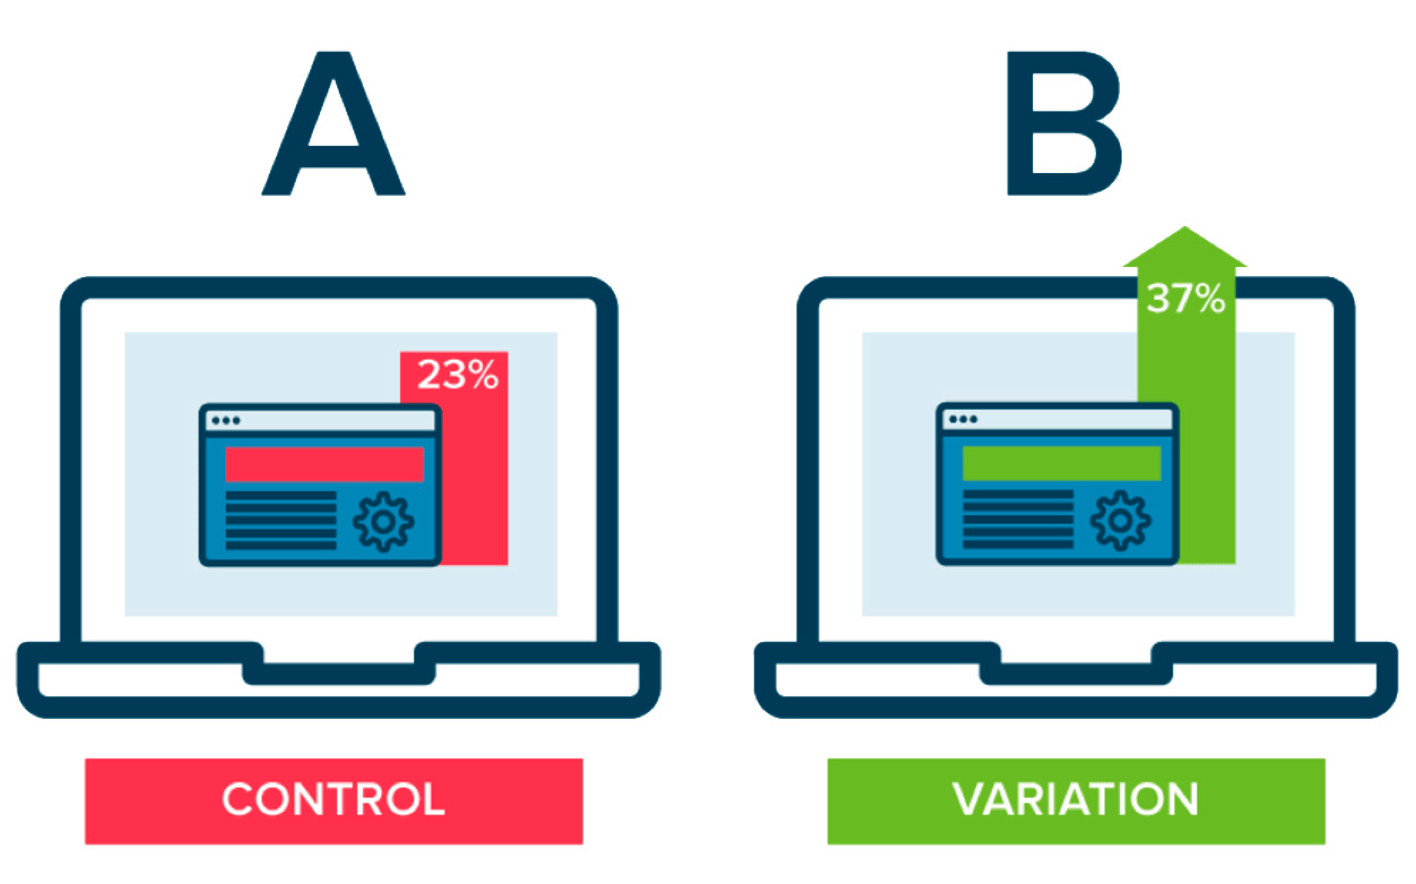

At the end of the month, we pulled the information and received:

Landing page A with a picture of the jungle had:
- 60,000 views and 10,000 donations

Landing page B with a picture of gorilla in a jungle refugee had:
- 70,000 views and 25,000 donations.

Proportions are then:

$$
\begin{align*}
P(\text{Landing_A} | \text{Success}) &= \frac{10000}{60000} = 0.167 \\
P(\text{Landing_B} | \text{Success}) &= \frac{25000}{70000} = 0.357
\end{align*}
$$

We wish to test that the landing pages elicited different amounts of donations. So, we will use a two-sided hypothesis test with the following hypotheses: 

$$
\begin{align*}
H_0: p_1 - p_2 = 0 \\ 
H_A: p_1 - p_2 \neq 0 \\ 
\end{align*}
$$

In this case, we have two distinct groups. So, we would like to use the two-proportion z-test. 

$$z = \frac{(\hat{p}_1 - \hat{p}_1) - 0}{\sqrt{\hat{p}\left( 1 - \hat{p}\right)(\frac{1}{n_1} + \frac{1}{n_2})}}$$

where $\hat{p}_1 = \frac{Y_1}{n_1}$, $\hat{p}_1 = \frac{Y_1}{n_1}$, $\hat{p} = \frac{Y_1 + Y_2}{n_1 + n_2}$, $Y_1$ and $Y_2$ refer to the positive responses, and $n_1$ and $n_2$ refer to the total number of observations for each landing page.

Now, we could write our own hypothesis calculations like before, however there are many built-in tests to [`statmodels.stats`](https://www.statsmodels.org/stable/stats.html). Let's use the [`proportions_ztest`](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest) to handle the computation.

In [23]:
from statsmodels.stats.proportion import proportions_ztest

# Describe successes and total trials
Y_1, n_1 = (10000, 60000)
Y_2, n_2 = (25000, 70000)

# Combine across trials values
event_successes = np.array([Y_1, Y_2])
sample_sizes = np.array([n_1, n_2])

# We omit the null hypothesis value as it is derived based
# on the other inputs we supply. 
test_stat_2z, p_value_2z = proportions_ztest(
    count = event_successes, 
    nobs = sample_sizes, 
    alternative = 'two-sided'
  )

# Report
print(f'z-stat: {test_stat_2z:0.4f}, p-value: {p_value_2z:0.3f}')

z-stat: -77.1865, p-value: 0.000


Moreover, we can quickly make a decision:

In [24]:
# As we are performing a two-sided test, 
# we divided the significance level by 2. 
alpha = 0.025

# Provide conclusion
if p_value_2z < alpha:
  print("Reject Null Hypothesis")
else:
  print("Do not reject null hypothesis")

Reject Null Hypothesis


## Your Turn: Understanding voters

Suppose we are interested in learning about any difference in the proportion of residents living in Illinois who support a certain law in U.S. compared to a proportion living in California who support a certain U.S. law. From the responses surveyed, we have 50 respondents in Illinois with 0.67 supporting the law and another 50 respondents in California with 0.57 supporting the law.



What would be the hypotheses? What kind of hypothesis test should be run?

---

answer
___

What would be the test statistic?

In [25]:
## code here

What would be the $p$-value given the test statistic? 

In [26]:
## code here

If we set the significance level to $\alpha = 0.20$, should we reject the null hypothesis? 

----

answer 

--- 